In [14]:
import pandas as pd

with open('../../results/performance.pkl', "rb") as f:
    df = pd.read_pickle(f)

df.columns

Index(['dataset', 'node_idx', 'trial', 'total_train_time', 'final_loss',
       'mem_before_mb', 'mem_after_mb', 'mem_delta_mb', 'subgraph_size',
       'num_edges'],
      dtype='object')

In [15]:
df

,dataset,node_idx,trial,total_train_time,final_loss,mem_before_mb,mem_after_mb,mem_delta_mb,subgraph_size,num_edges
0,BAShapes Sparse,563,0,0.539091,-12.478003,758.250000,761.183594,2.933594,107,660
1,BAShapes Sparse,563,1,0.521763,-12.478003,761.183594,761.195312,0.011719,107,660
2,BAShapes Sparse,563,2,0.507139,-12.478003,761.195312,761.203125,0.007812,107,660
3,BAShapes Sparse,563,3,0.506669,-12.478003,761.203125,761.203125,0.000000,107,660
4,BAShapes Sparse,563,4,0.506508,-12.478003,761.203125,761.203125,0.000000,107,660
...,...,...,...,...,...,...,...,...,...,...
195,BAShapes Dense,451,0,0.158505,2.579144,768.187500,768.187500,0.000000,108,756
196,BAShapes Dense,451,1,0.155712,2.579144,768.187500,768.187500,0.000000,108,756
197,BAShapes Dense,451,2,0.156046,2.579144,768.187500,768.187500,0.000000,108,756
198,BAShapes Dense,451,3,0.157031,2.579144,768.187500,768.187500,0.000000,108,756


In [16]:
grouped_stats = df.groupby(['dataset', 'node_idx']).agg({
    'total_train_time': 'mean',
    'subgraph_size': 'first',
    'num_edges': 'first',
}).reset_index()

grouped_stats


,dataset,node_idx,total_train_time,subgraph_size,num_edges
0,BAShapes Dense,13,1.490923,596,3736
1,BAShapes Dense,15,1.489676,592,3726
2,BAShapes Dense,110,1.143946,503,3470
3,BAShapes Dense,206,0.869717,422,3246
4,BAShapes Dense,214,0.992824,496,3458
5,BAShapes Dense,215,0.765549,419,3238
6,BAShapes Dense,232,0.820050,454,3334
7,BAShapes Dense,245,0.904620,462,3354
8,BAShapes Dense,298,0.822519,438,3288
9,BAShapes Dense,310,0.820790,438,3288


In [17]:
exp_stats = df.groupby(['dataset']).agg({
    'total_train_time': 'mean',
    'subgraph_size': 'mean',
    'num_edges': 'mean',
}).reset_index()

exp_stats


,dataset,total_train_time,subgraph_size,num_edges
0,BAShapes Dense,0.662531,337.7,2470.1
1,BAShapes Sparse,0.336654,337.7,2470.1


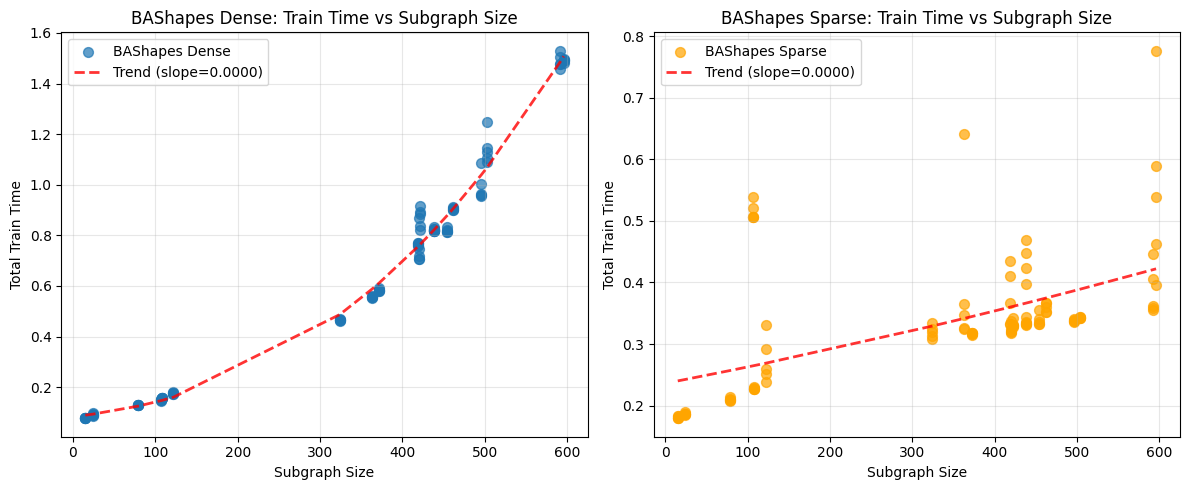

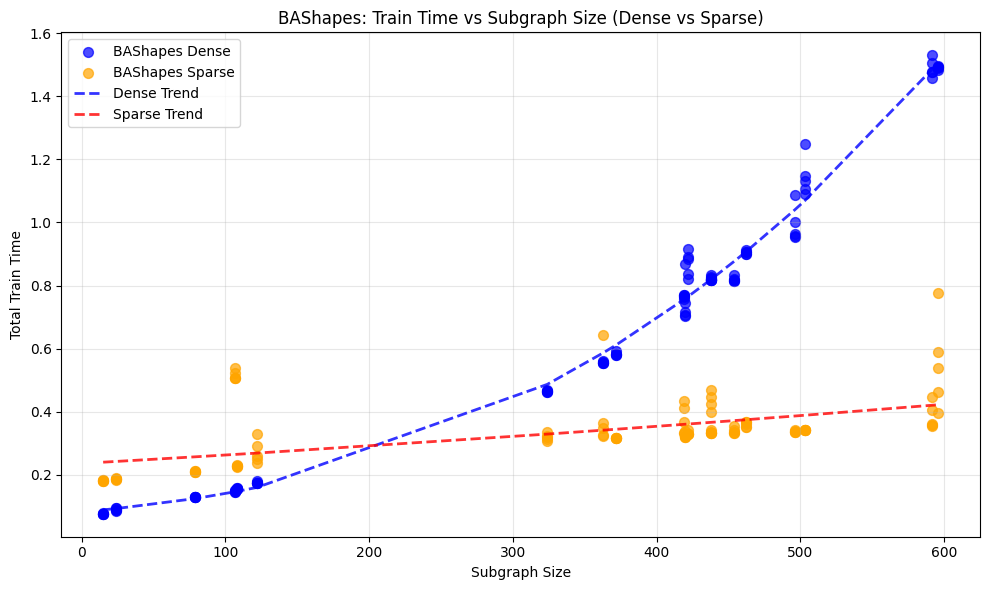

/tmp/ipykernel_2627/3470371998.py:103: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend()
/tmp/ipykernel_2627/3470371998.py:104: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax2.legend()


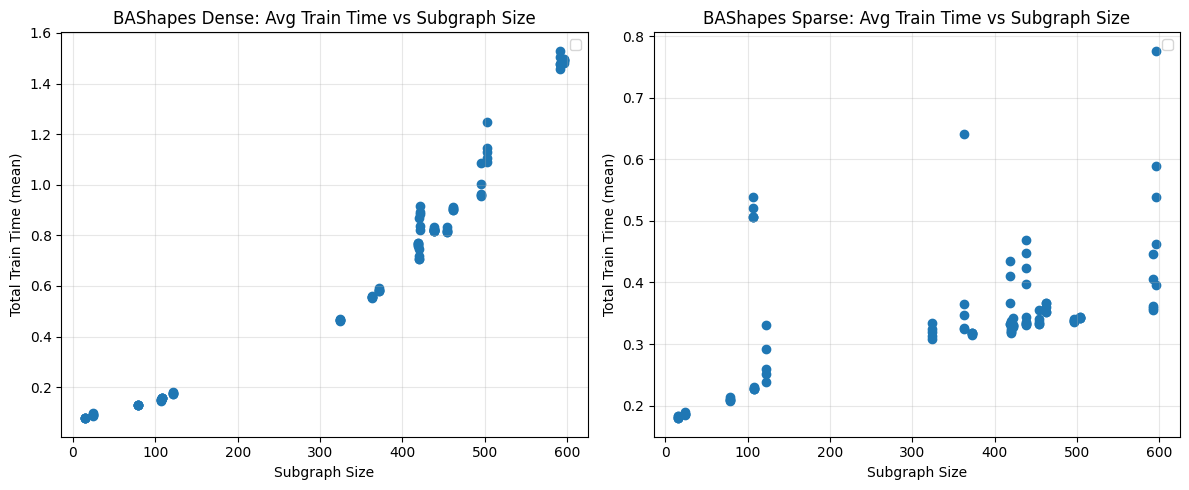

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming your dataframe is named 'df'
# Filter for BAShapes experiments
bashapes_data = df[df['dataset'].isin(['BAShapes Sparse', 'BAShapes Dense'])]

# Create separate dataframes for dense and sparse
bashapes_dense = bashapes_data[bashapes_data['dataset'] == 'BAShapes Dense']
bashapes_sparse = bashapes_data[bashapes_data['dataset'] == 'BAShapes Sparse']

# Create figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

x_axis = 'subgraph_size'

# Plot BAShapes Dense
ax1.scatter(bashapes_dense[x_axis], bashapes_dense['total_train_time'],
           alpha=0.7, s=50, label='BAShapes Dense')
ax1.set_xlabel('Subgraph Size')
ax1.set_ylabel('Total Train Time')
ax1.set_title('BAShapes Dense: Train Time vs Subgraph Size')
ax1.grid(True, alpha=0.3)

# Plot BAShapes Sparse
ax2.scatter(bashapes_sparse[x_axis], bashapes_sparse['total_train_time'],
           alpha=0.7, s=50, color='orange', label='BAShapes Sparse')
ax2.set_xlabel('Subgraph Size')
ax2.set_ylabel('Total Train Time')
ax2.set_title('BAShapes Sparse: Train Time vs Subgraph Size')
ax2.grid(True, alpha=0.3)

# Add trend lines if you want
z1 = np.polyfit(bashapes_dense[x_axis], bashapes_dense['total_train_time'], 3)
p1 = np.poly1d(z1)
ax1.plot(bashapes_dense[x_axis].sort_values(),
        p1(bashapes_dense[x_axis].sort_values()),
        "r--", alpha=0.8, linewidth=2, label=f'Trend (slope={z1[0]:.4f})')

z2 = np.polyfit(bashapes_sparse[x_axis], bashapes_sparse['total_train_time'], 2)
p2 = np.poly1d(z2)
ax2.plot(bashapes_sparse[x_axis].sort_values(),
        p2(bashapes_sparse[x_axis].sort_values()),
        "r--", alpha=0.8, linewidth=2, label=f'Trend (slope={z2[0]:.4f})')

ax1.legend()
ax2.legend()

plt.tight_layout()
plt.show()

# Alternative: Combined plot with both dense and sparse
plt.figure(figsize=(10, 6))

# Plot both on same figure
plt.scatter(bashapes_dense[x_axis], bashapes_dense['total_train_time'],
           alpha=0.7, s=50, label='BAShapes Dense', color='blue')
plt.scatter(bashapes_sparse[x_axis], bashapes_sparse['total_train_time'],
           alpha=0.7, s=50, label='BAShapes Sparse', color='orange')

plt.xlabel('Subgraph Size')
plt.ylabel('Total Train Time')
plt.title('BAShapes: Train Time vs Subgraph Size (Dense vs Sparse)')
plt.grid(True, alpha=0.3)
plt.legend()

# Add trend lines
plt.plot(bashapes_dense[x_axis].sort_values(),
        p1(bashapes_dense[x_axis].sort_values()),
        "b--", alpha=0.8, linewidth=2, label='Dense Trend')
plt.plot(bashapes_sparse[x_axis].sort_values(),
        p2(bashapes_sparse[x_axis].sort_values()),
        "r--", alpha=0.8, linewidth=2, label='Sparse Trend')

plt.legend()
plt.tight_layout()
plt.show()

# If you have multiple trials and want to show average per subgraph size
if 'trial' in df.columns:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # Calculate averages for dense
    dense_avg = bashapes_dense.groupby(x_axis)['total_train_time'].agg(['mean', 'std']).reset_index()
#     ax1.errorbar(dense_avg[x_axis], dense_avg['mean'], yerr=dense_avg['std'],
                # fmt='o', capsize=5, label='BAShapes Dense ± std')
    ax1.scatter(bashapes_dense[x_axis], bashapes_dense['total_train_time'])
    ax1.set_xlabel('Subgraph Size')
    ax1.set_ylabel('Total Train Time (mean)')
    ax1.set_title('BAShapes Dense: Avg Train Time vs Subgraph Size')
    ax1.grid(True, alpha=0.3)

    # Calculate averages for sparse
    sparse_avg = bashapes_sparse.groupby(x_axis)['total_train_time'].agg(['mean', 'std']).reset_index()
#     ax2.errorbar(sparse_avg[x_axis], sparse_avg['mean'], yerr=sparse_avg['std'],
                # fmt='o', capsize=5, color='orange', label='BAShapes Sparse ± std')
    ax2.scatter(bashapes_sparse[x_axis], bashapes_sparse['total_train_time'])
    ax2.set_xlabel('Subgraph Size')
    ax2.set_ylabel('Total Train Time (mean)')
    ax2.set_title('BAShapes Sparse: Avg Train Time vs Subgraph Size')
    ax2.grid(True, alpha=0.3)

    ax1.legend()
    ax2.legend()
    plt.tight_layout()
    plt.show()